# Linear Regression with a categorical feature

In this notebook we create a `zipcode_2` feature from `zipcode` and use OneHotEncoding to add the `zipcode_2` feature to the model.

First we show how this can be done manually (without using a `Pipeline`).
Then we show how this can be done using a `Pipeline`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Prepare data

In [2]:
# Load the train data
train_data = pd.read_csv('../data/houses_train.csv', index_col=0)

In [3]:
# Split data into features and labels.
X_data = train_data.drop(columns='price')
y_data = train_data['price']

In [4]:
# Split features and labels into train (X_train, y_train) and validation set (X_val, y_val).
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=X_data['object_type_name'], test_size=0.1, random_state=17)

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define and train model

Here we do the following steps:

1. we create a new feature `zipcode_2` from `zipcode`
2. we define the `OneHotEncoder` for `zipcode_2`.
3. we "train" (`fit`) and apply (`transform`) the OneHotEncoder. We can think of `fit` in the `OneHotEncoder` as fixating the mapping, which `zipcode_2` value becomes the $i$th column in the output and `transform` as actually doing the `one-hot-encoding`.
4. we combine the `living_area` feature with the features from the one-hot-encoded `zipcode_2`.

In [6]:
# 1.
X_train['zipcode_2'] = (X_train['zipcode'] // 100).astype("string")

# 2.
zipcode_2 = OneHotEncoder(handle_unknown='ignore', drop='first')

# 3.
X_train_zipcode_2 = zipcode_2.fit_transform(X_train[['zipcode_2']])
X_train_zipcode_2 = pd.DataFrame(data=X_train_zipcode_2.toarray(), index=X_train.index, columns=zipcode_2.categories_[0][1:])

# 4.
X_train_ohe = pd.concat([
    X_train[['living_area']],  # numerical features
    X_train_zipcode_2,  # object_type_name OneHot features
], axis=1)

`X_train_ohe` has now the `living_area` feature and features from the one-hot-encoded `zipcode_2`.

In [7]:
display(X_train_ohe.head())

,living_area,11,12,13,14,15,16,17,18,19,...,87,88,89,90,91,92,93,94,95,96
id,,,,,,,,,,,,,,,,,,,,,
17153,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9619,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17291,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11971,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8171,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can train our `LinearRegression` model on this data:

In [8]:
model = LinearRegression()
_ = model.fit(X_train_ohe, y_train)

## What happened (Extra)

What actually happened in the `fit` method of the `LinearRegression` model?
We learned the parameters ($\vec{\beta}$) based on the training data.

How many parameters did we learn?
In the LinearRegression model, we learned one parameter for each feature, plus one parameter for the intercept.
So given 84 features, we must have learned 85 parameters.

Let's check this:

In [9]:
print(f"Number of train samples: ", f"{X_train_ohe.shape[0]}")
print(f"Number of features: ", f"{X_train_ohe.shape[1]}")
# Note that model.coef_ is [ beta_1, beta_2, ..., beta_84 ] and model.intercept_ is beta_0 (that's why we + 1)
print(f"Number of learned parameters: ", f"{model.coef_.shape[0] + 1}")

Number of train samples:  18281
Number of features:  83
Number of learned parameters:  84


We can also check the learned parameters (however they are not very interpretable):

In [10]:
print(f"Intercept: ", f"{model.intercept_}")
print(f"Coef: ", f"{model.coef_}")

Intercept:  963159.2374660344
Coef:  [   2240.79564974   73173.87790816  401642.21216112 -527289.17820154
 -426048.68807707 -506061.82402918 -518548.035423   -451090.52909644
 -325186.15778428 -303431.69696242 -288519.11200414 -892756.84750197
 -611985.40478249 -748732.03567946 -916001.6503796  -575283.84626315
 -784695.62093357 -915724.86984306 -698771.0574604  -933337.53546546
 -316275.70277934 -449551.58335277 -513487.53640805 -538596.52566167
 -598631.66392933 -660315.22930934 -430334.65925328 -422639.3682725
 -389379.25691229 -633851.75313312 -111779.34623067  -86714.18425032
 -494886.99320722 -406180.77962671 -447840.06044377 -605356.14260426
 -594994.99369375 -634574.53049514 -535367.83766766 -730879.72562519
 -454973.8649571  -581253.32807984 -506880.01074196 -564834.4613259
 -342649.56866792 -500053.85502461 -406911.86013547 -536327.70358486
 -181449.83841408 -628457.40904341 -372414.81302498   64601.02044068
 -159683.51154989 -365743.21210938 -140272.72553366 -752099.36929137

## Predict and evaluate prices for the validation set

The trained model will now be applied to the validation set.

We have to **reuse** the `fitted` `OneHotEncoder` from the training set to transform the validation set.
Reusing is critical, because the mapping has to be consistent for training set and validation set.

We have to do the following steps:

1. Prep validation data, note that the steps are the same as for the training data.
2. Evaluate trained model on validation data

In [11]:
# 1.
X_val['zipcode_2'] = (X_val['zipcode'] // 100).astype("string")

X_val_zipcode_2 = zipcode_2.transform(X_val[['zipcode_2']])
X_val_zipcode_2 = pd.DataFrame(data=X_val_zipcode_2.toarray(), index=X_val.index, columns=zipcode_2.categories_[0][1:])

X_val_ohe = pd.concat([
    X_val[['living_area']],
    X_val_zipcode_2
], axis=1)

# 2.
y_val_pred = model.predict(X_val_ohe)
print(mean_absolute_percentage_error(y_val, y_val_pred))

38.32520276759203


This was tedious and error-prone.
We have to be careful to apply the same steps to the validation set as we did to the training set.
We can use a `Pipeline` to automate this process.

# Using a Pipeline

**Here we do the same we did above but with a `Pipeline`.**

A Pipeline describes a sequence of steps, which are applied to the data.

Here our Pipeline consists of the following steps:

1. `FunctionTransformer` to create the `zipcode_2` feature.
2. `ColumnTransformer` to
    a. one-hot-encode the `zipcode_2`
    b. Keep the `living_area` feature
    c. Drop all other feature except
3. `LinearRegression` to train the model.

In [12]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

def create_zipcode_2(X: pd.DataFrame):
    X['zipcode_2'] = (X['zipcode'] // 100).astype("string")
    return X

# 1. Define Pipeline
model = Pipeline([
    # 1.
    ('fe', FunctionTransformer(create_zipcode_2)),
    # 2.
    ('ohe', make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), ['zipcode_2']), # a. One-hot-encode zipcode_2
        ('passthrough', ['living_area']), # b. Pass through living_area
        remainder='drop' # c. Drop all other features
    )),
    # 3.
    ('model', LinearRegression()),
])

Now that we have defined the Pipeline, we can train it (1.) on the training data and evaluate it on the validation data (2.).

Note that we do not have to apply the same steps to the validation data as we did to the training data. All steps are applied inside the `Pipeline` (automatically).

In [13]:
# 1. Train Pipeline
_ = model.fit(X_train, y_train)

# 2. Predict for prepared validation data
y_val_pred = model.predict(X_val)
print(mean_absolute_percentage_error(y_val, y_val_pred))

38.32793068233405


Given this example we hope you can see the advantages of using a `Pipeline`. It makes the code more readable and less error-prone. It also makes it easier to try out different models and different preprocessing steps. You can just add a new step to the Pipeline and you are good to go.

## (Extra) Learning Curve

With the learning curve we can analyse if the model needs more data or we have sufficient data.

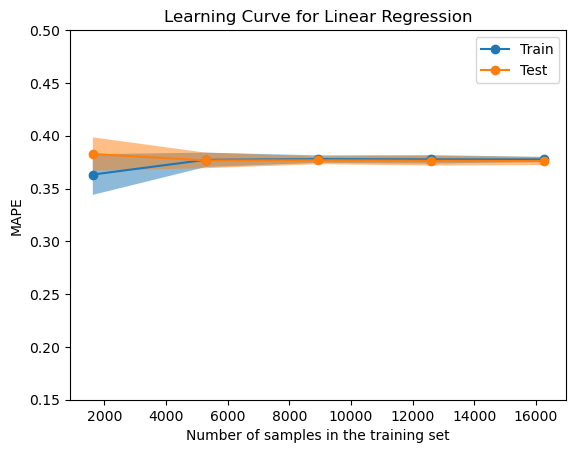

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

common_params = {
    "X": X_data,
    "y": y_data,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "MAPE",
}
lcd = LearningCurveDisplay.from_estimator(model, **common_params, scoring='neg_mean_absolute_percentage_error', negate_score=True)
lcd.ax_.set_ylim(ymin=0.15, ymax=0.5)
plt.title("Learning Curve for Linear Regression")
plt.show()

This model would not improve with more data. Additionally it `underfits` the data. The model did not improve from around `5000` data on.